In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df_amazon =  pd.read_excel("Amazon.xlsx")

In [28]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    object
 1   Velocidad Entrega  100 non-null    int64 
 2   Precio             100 non-null    int64 
 3   Durabilidad        100 non-null    int64 
 4   Imagen Producto    100 non-null    int64 
 5   Valor Educativo    100 non-null    int64 
 6   Servicio Retorno   100 non-null    int64 
 7   Tamano Paquete     100 non-null    int64 
 8   Calidad Producto   100 non-null    int64 
 9   Numero Estrellas   100 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 7.9+ KB


In [36]:
df_amazon = df_amazon.rename(columns = {'Unnamed: 0': 'Nombres'})

In [37]:
df_amazon.drop_duplicates()
df_amazon.isnull().sum()

Nombres              0
Velocidad Entrega    0
Precio               0
Durabilidad          0
Imagen Producto      0
Valor Educativo      0
Servicio Retorno     0
Tamano Paquete       0
Calidad Producto     0
Numero Estrellas     0
dtype: int64

In [44]:
df_amazon_nombres = df_amazon.Nombres
df_amazon_valores = df_amazon.drop("Nombres", axis=1)
print('\n'), df_amazon_valores.info(),  print('\n'),  df_amazon_nombres.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Velocidad Entrega  100 non-null    int64
 1   Precio             100 non-null    int64
 2   Durabilidad        100 non-null    int64
 3   Imagen Producto    100 non-null    int64
 4   Valor Educativo    100 non-null    int64
 5   Servicio Retorno   100 non-null    int64
 6   Tamano Paquete     100 non-null    int64
 7   Calidad Producto   100 non-null    int64
 8   Numero Estrellas   100 non-null    int64
dtypes: int64(9)
memory usage: 7.2 KB


<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Nombres
Non-Null Count  Dtype 
--------------  ----- 
100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


(None, None, None, None)

In [50]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from sklearn import decomposition as decomp

In [53]:
df_amazon_valores_scaled  =  pd.DataFrame(normalize(df_amazon_valores))

In [54]:
df_amazon_valores_scaled

,0,1,2,3,4,5,6,7,8
0,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344
1,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287
2,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102
3,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597
4,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642
...,...,...,...,...,...,...,...,...,...
95,0.045932,0.122484,0.489936,0.382763,0.107174,0.321521,0.643041,0.260279,0.015311
96,0.640241,0.052479,0.096561,0.050380,0.069272,0.058776,0.745198,0.054578,0.094462
97,0.005043,0.070602,0.131118,0.126075,0.121032,0.136161,0.211805,0.932952,0.115989
98,0.357707,0.025386,0.773109,0.078465,0.060003,0.066926,0.096927,0.496175,0.062310


Text(0.5, 1.0, 'Dendograma Amazon Clientes')

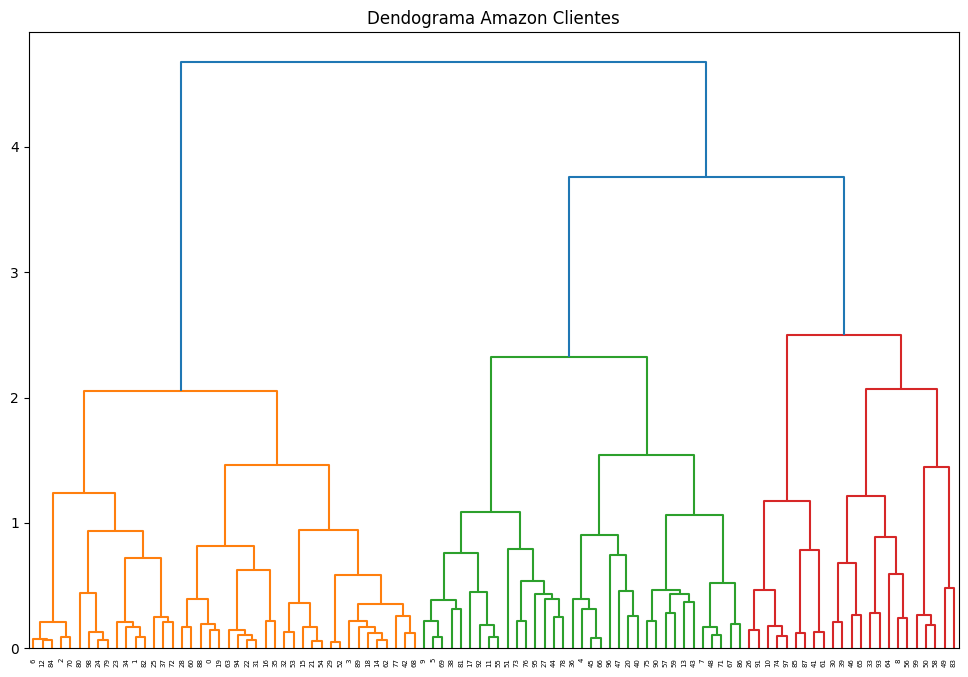

In [66]:
plt.figure(figsize=(12,8))
dendograma = shc.dendrogram(shc.linkage(df_amazon_valores_scaled, method='ward'))
plt.title("Dendograma Amazon Clientes")

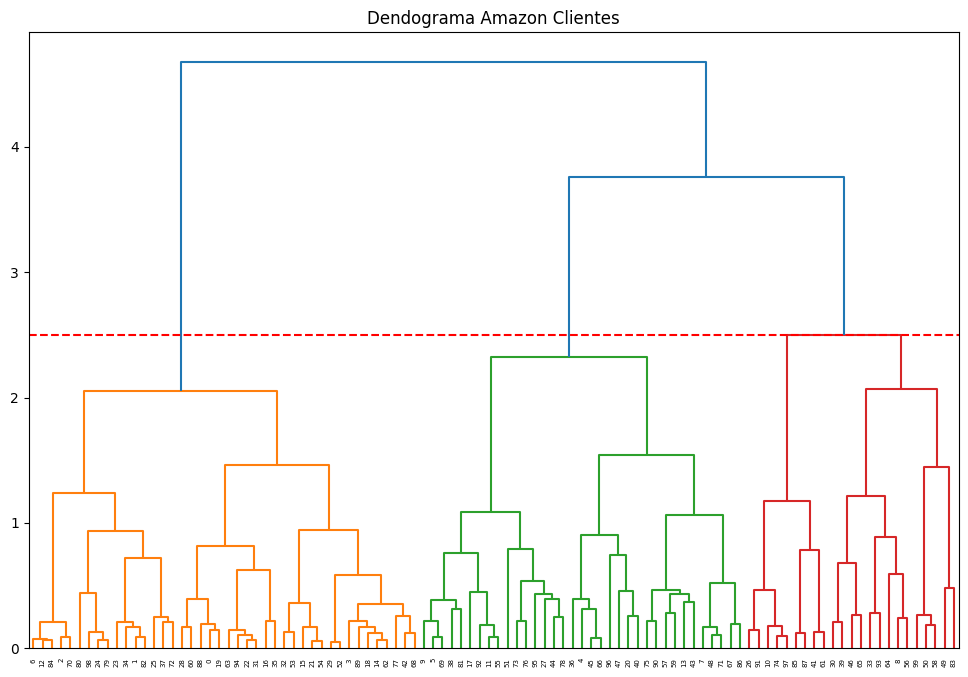

In [71]:
plt.figure(figsize=(12,8))
dendograma = shc.dendrogram(shc.linkage(df_amazon_valores_scaled, method='ward'))
plt.title("Dendograma Amazon Clientes")
plt.axhline(y=2.5, c="r", linestyle="--")

In [64]:
colores_unicos = set(dendograma['color_list'])
num_clusters_optimo = len(colores_unicos) - 1
print("Número de clusters óptimo:" , num_clusters_optimo)

Número de clusters óptimo: 3


In [182]:
pca =  decomp.PCA(n_components=2)
df_amazonPCA = pca.fit_transform(df_amazon_valores_scaled)
df_amazonPCA[:5]

array([[ 0.39993219, -0.06035374],
       [ 0.40829583,  0.06402268],
       [ 0.49703182,  0.35955286],
       [ 0.33996675, -0.18434501],
       [-0.58207751,  0.38797653]])

In [101]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage= 'ward')
grupos = cluster.fit_predict(df_amazon_valores_scaled)
grupos

array([1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0], dtype=int64)

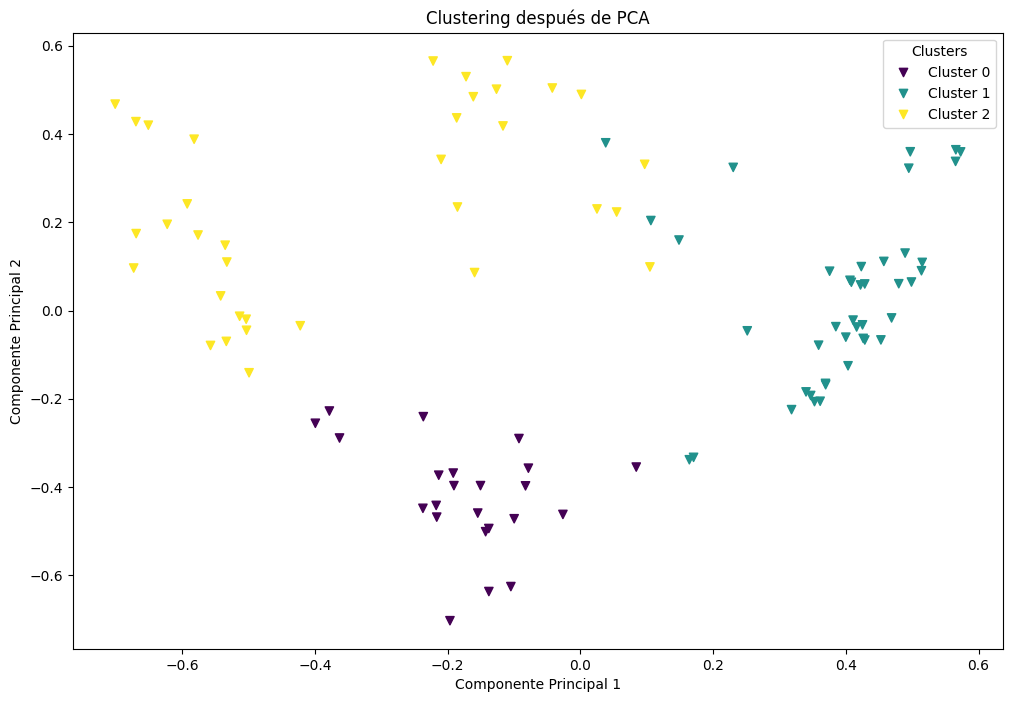

In [271]:
# Graficar con matplotlib, figura y luego creando grafica de dispersion
plt.figure(figsize=(12,8))
dispersion_amazon = plt.scatter(df_amazonPCA[:, 0], df_amazonPCA[:, 1], c =  cluster.labels_ , cmap = 'viridis', marker='v' )

# Guardar etiquetas
cluster_labels = np.unique(cluster.labels_)

# Añadir la leyenda al gráfico
plt.title('Clustering después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Crear la leyenda con números de clusters y colores correspondientes
handles, labels = dispersion_amazon.legend_elements()
plt.legend(handles, [f'Cluster {i}' for i in cluster_labels], title="Clusters")


# Mostrar el gráfico
plt.show()


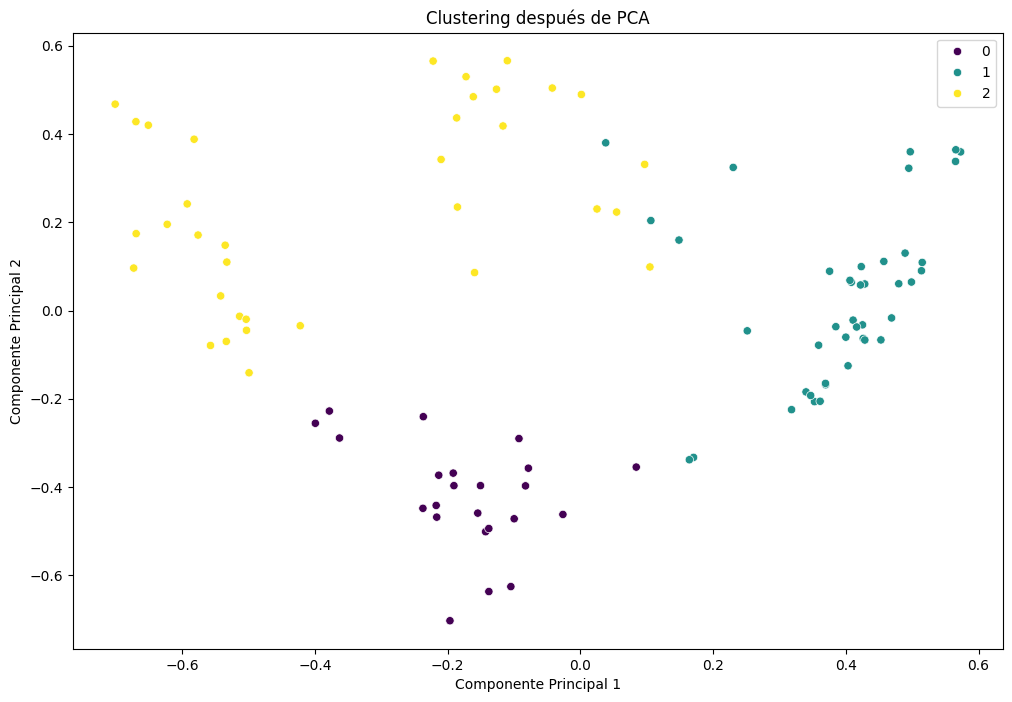

In [270]:
import seaborn as sns

# Grafico con sea born con figura de matplotlib
plt.figure(figsize=(12,8))
dispersion_amazon2 = sns.scatterplot(x=df_amazonPCA[:, 0], y=df_amazonPCA[:, 1], hue=cluster.labels_, palette='viridis')

# Añadir la leyenda al gráfico
plt.title('Clustering después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Mostrar el gráfico
plt.show()


In [212]:
df_amazon['Grupo'] = pd.DataFrame(grupos, columns=['Grupo'])
df_amazon.head()

,Nombres,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,2


In [213]:
df_amazon['Grupo'].value_counts()

Grupo
1    42
2    35
0    23
Name: count, dtype: int64

## Ejercicio

In [242]:
# Buscar a "Salome, Stephania, Lydia" en la columna "Nombres"
salome = df_amazon[df_amazon['Nombres'] == 'Salome']
salome

,Nombres,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
81,Salome,17,23,275,41,4,44,315,28,32,2


### Salome pertenece al grupo 2

In [241]:
stephania = df_amazon[df_amazon['Nombres'] == 'Stephania']
stephania

,Nombres,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
89,Stephania,215,125,465,315,34,4,37,305,45,1


In [248]:
lydia = df_amazon[df_amazon['Nombres'] == 'Lydia']
lydia

,Nombres,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
54,Lydia,19,4,435,145,16,21,28,185,24,1


### Stephania y Lydia pertenecen al grupo 1

In [245]:
Grupo0 = df_amazon[df_amazon['Grupo'] == 0]
Grupo1 = df_amazon[df_amazon['Grupo'] == 1]
Grupo2 = df_amazon[df_amazon['Grupo'] == 2]
Grupo0.head()

,Nombres,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
8,Xavier,275,8,47,235,35,3,38,27,48,0
10,Marisol,12,8,44,24,2,28,29,215,17,0
26,Florent,12,75,33,24,19,25,36,185,21,0
30,Herman,15,16,3,265,31,3,4,165,28,0
33,Isadore,17,185,32,285,35,34,42,19,32,0


In [261]:
SalomeRecomendacion = Grupo2['Imagen Producto']
print(f'Recomendaria a Salomé la siguiente lista de productos : {SalomeRecomendacion.tolist()}')

Recomendaria a Salomé la siguiente lista de productos : [39, 24, 255, 3, 23, 285, 215, 2, 305, 29, 27, 23, 235, 185, 23, 28, 225, 25, 35, 275, 235, 31, 265, 26, 155, 225, 245, 305, 225, 41, 295, 355, 39, 25, 24]


In [268]:
print(f'Recomendaria a Salomé los mismos productos que compró : {", ".join(Grupo2['Nombres'].tolist())}')

Recomendaria a Salomé los mismos productos que compró : Emilia, Fabian, Frank, Gabriel, Henry, Isabelle, Eugenia, Evdokia, Florence, Jeremiah, Joachim, Santiago, Justin, Kalyna, Larissa, Leon, Leonard, Leo, Magdalyna, Marcel, Maria, Maryna, Matthew, Maya, Melania, Michael, Mina, Monica, Myron, Salome, Sebastian, Susanna, Sylvester, Teofan, Teofil


In [253]:
StephaniaRecomendacion = Grupo1['Imagen Producto']
print(f'Recomendaria a Lydia y a Stephania la siguiente lista de productos : {StephaniaRecomendacion.tolist()}')

Recomendaria a Lydia y a Stephania la siguiente lista de productos : [235, 33, 3, 295, 33, 19, 335, 235, 255, 305, 335, 125, 355, 24, 24, 29, 175, 275, 345, 295, 17, 225, 27, 225, 295, 245, 145, 225, 275, 245, 185, 31, 24, 165, 23, 19, 32, 3, 305, 315, 225, 34]


In [269]:
print(f'Recomendaria a Lydia y a Stephania los mismos productos que compró : {", ".join(Grupo1['Nombres'].tolist())}')

Recomendaria a Lydia y a Stephania los mismos productos que compró : Adam, Anna, Bernard, Edward, Philip, Irene, Isidore, Joseph, Eugene, Eunice, Eva, Fedir, Felix, Fialka, Flavia, Flora, Hannah, Helen, Hilary, Lourdes, Ivan, Jacob, Jervis, Judith, Louise, Lubomyr, Lydia, Marian, Markian, Marko, Maura, Maximillian, Methodius, Mykyta, Myroslav, Myroslava, Samuel, Sarah, Stephan, Stephania, Theodore, Teon
